# IEEEG1 and Its Variants

In [1]:
import matplotlib.pyplot as plt

import andes

In [2]:
%matplotlib inline

In [3]:
andes.config_logger(20)

In [4]:
s1 = andes.load(andes.get_case('kundur/kundur_ieeeg1.xlsx'),
                setup=False, no_output=True, default_config=True)
s2 = andes.load(andes.get_case('kundur/kundur_ieeeg1gv.xlsx'),
                setup=False, no_output=True, default_config=True)
s3 = andes.load(andes.get_case('kundur/kundur_ieeeg1ts.xlsx'),
                setup=False, no_output=True, default_config=True)
            
for ss in [s1, s2, s3]:

    ss.Toggle.alter(src='u', idx=1, value=0)

    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_0', src='Ppf',
                           attr='v', method='+', amount=0.4))
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_1', src='Ppf',
                           attr='v', method='+', amount=0.4))

    ss.setup()

for ss in [s1, s2, s3]:
    # Constant load
    ss.PQ.config.p2p = 1
    ss.PQ.config.q2q = 1
    ss.PQ.config.p2z = 0
    ss.PQ.config.q2z = 0

    ss.PFlow.run()

Working directory: "/Users/jinningwang/work/andes/examples/demonstration"
> Loaded generated Python code in "/Users/jinningwang/.andes/pycode".
Parsing input file "/Users/jinningwang/work/andes/andes/cases/kundur/kundur_ieeeg1.xlsx"...
Input file parsed in 0.2757 seconds.
Working directory: "/Users/jinningwang/work/andes/examples/demonstration"
> Reloaded generated Python code of module "pycode".
Parsing input file "/Users/jinningwang/work/andes/andes/cases/kundur/kundur_ieeeg1gv.xlsx"...
Input file parsed in 0.0196 seconds.
Working directory: "/Users/jinningwang/work/andes/examples/demonstration"
> Reloaded generated Python code of module "pycode".
Parsing input file "/Users/jinningwang/work/andes/andes/cases/kundur/kundur_ieeeg1ts.xlsx"...
Input file parsed in 0.0194 seconds.
System internal structure set up in 0.0145 seconds.
System internal structure set up in 0.0134 seconds.
System internal structure set up in 0.0136 seconds.
-> System connectivity check results:
  No islanded bus

In [5]:
for ss in [s1, s2, s3]:
    _ = ss.TDS.init()

Initialization for dynamics completed in 0.0387 seconds.
Initialization was successful.
Initialization for dynamics completed in 0.0172 seconds.
Initialization was successful.
Initialization for dynamics completed in 0.0174 seconds.
Initialization was successful.


In [6]:
for ss in [s1, s2, s3]:
    ss.TDS.config.tf = 100
    ss.TDS.config.criteria = 0
    ss.TDS.config.no_tqdm = True
    ss.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-100 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


<Alter Alter_2>: set PQ.PQ_0.Ppf.v=11.99 at t=1. Previous value was 11.59.
<Alter Alter_3>: set PQ.PQ_1.Ppf.v=16.15 at t=1. Previous value was 15.75.


Simulation to t=100.00 sec completed in 1.7214 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-100 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


<Alter Alter_2>: set PQ.PQ_0.Ppf.v=11.99 at t=1. Previous value was 11.59.
<Alter Alter_3>: set PQ.PQ_1.Ppf.v=16.15 at t=1. Previous value was 15.75.


Simulation to t=100.00 sec completed in 1.9534 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-100 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


<Alter Alter_2>: set PQ.PQ_0.Ppf.v=11.99 at t=1. Previous value was 11.59.
<Alter Alter_3>: set PQ.PQ_1.Ppf.v=16.15 at t=1. Previous value was 15.75.


Simulation to t=100.00 sec completed in 1.9733 seconds.


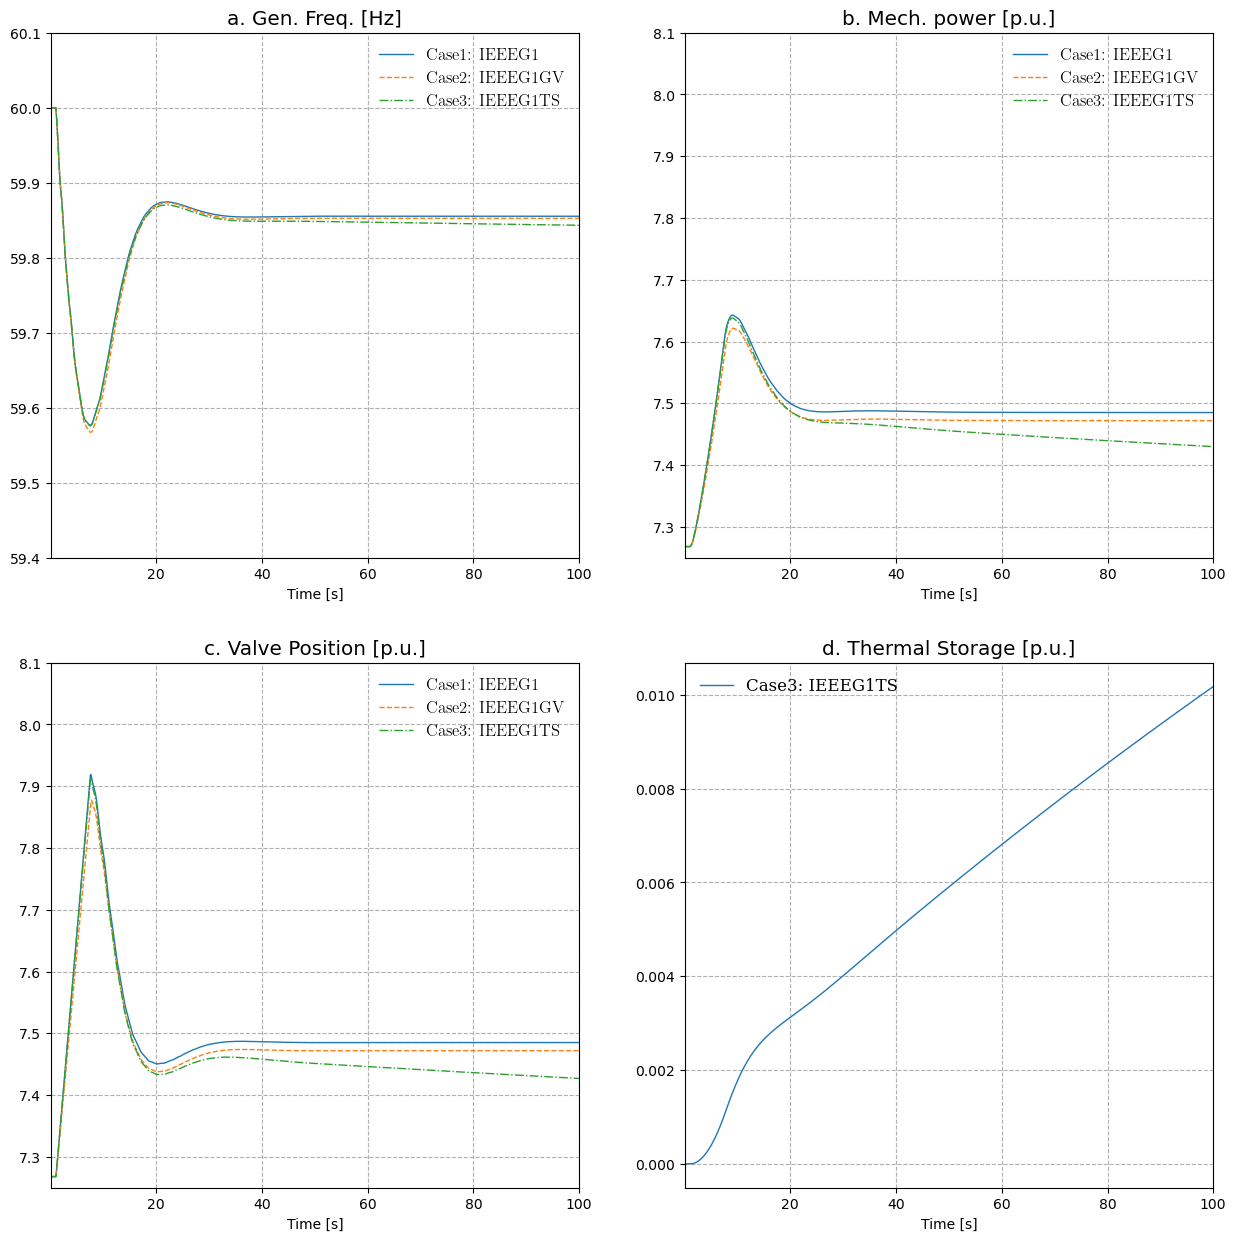

In [7]:
plt.style.use('default')

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

a = (3,)
fmin, fmax = 59.4, 60.1
_ = s1.TDS.plt.plot(s1.GENROU.omega,
                    a=a,
                    ymin=fmin, ymax=fmax,
                    ytimes=s1.config.freq,
                    grid=True, show=False, latex=False,
                    yheader=['Case1: IEEEG1'],
                    title='a. Gen. Freq. [Hz]',
                    fig=fig, ax=ax[0, 0])
_ = s2.TDS.plt.plot(s2.GENROU.omega,
                    a=a,
                    ytimes=s2.config.freq,
                    show=False,
                    yheader=['Case2: IEEEG1GV'],
                    linestyles=['--'],
                    fig=fig, ax=ax[0, 0])
_ = s3.TDS.plt.plot(s3.GENROU.omega,
                    a=a,
                    ytimes=s3.config.freq,
                    show=False,
                    yheader=['Case3: IEEEG1TS'],
                    linestyles=['-.'],
                    fig=fig, ax=ax[0, 0])

a = (0,)
pmin, pmax = 7.25, 8.1
_ = s1.TDS.plt.plot(s1.IEEEG1.pout,
                    a=a,
                    grid=True, show=False, latex=False,
                    ymin=pmin, ymax=pmax,
                    yheader=['Case1: IEEEG1']*len(a),
                    title='b. Mech. power [p.u.]',
                    fig=fig, ax=ax[0, 1])
_ = s2.TDS.plt.plot(s2.IEEEG1GV.pout,
                    show=False,
                    yheader=['Case2: IEEEG1GV']*len(a),
                    linestyles=['--'],
                    fig=fig, ax=ax[0, 1])
_ = s3.TDS.plt.plot(s3.IEEEG1TS.pout,
                    show=False,
                    yheader=['Case3: IEEEG1TS']*len(a),
                    linestyles=['-.'],
                    fig=fig, ax=ax[0, 1])

a = (0,)
_ = s1.TDS.plt.plot(s1.IEEEG1.GV,
                    a=a,
                    grid=True, show=False, latex=False,
                    ymin=pmin, ymax=pmax,
                    yheader=['Case1: IEEEG1']*len(a),
                    title='c. Valve Position [p.u.]',
                    fig=fig, ax=ax[1, 0])
_ = s2.TDS.plt.plot(s2.IEEEG1GV.GV,
                    show=False,
                    yheader=['Case2: IEEEG1GV']*len(a),
                    linestyles=['--'],
                    fig=fig, ax=ax[1, 0])
_ = s3.TDS.plt.plot(s3.IEEEG1TS.GV,
                    show=False,
                    yheader=['Case3: IEEEG1TS']*len(a),
                    linestyles=['-.'],
                    fig=fig, ax=ax[1, 0])

_ = s3.TDS.plt.plot(s3.IEEEG1TS.TS.y,
                    grid=True, show=False, latex=False,
                    yheader=['Case3: IEEEG1TS']*len(a),
                    title='d. Thermal Storage [p.u.]',
                    fig=fig, ax=ax[1, 1])